In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    readHEPDataCsv,
    fromHB5Table1,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `t>H+b>taunu` [1807.07915](https://arxiv.org/abs/1807.07915)


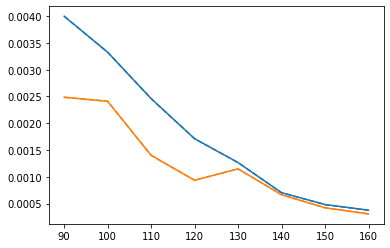

Looks good. Saving this to brtHpb_LHC13_ATLAS_36.json


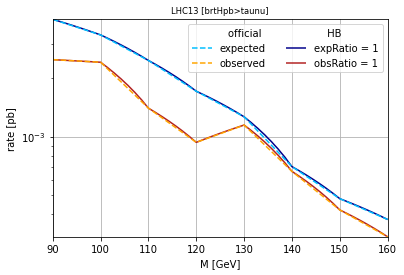

In [2]:
df = fromHB5Table1("079152_Atlas_t-Hpb-taunu_36fb-1", "ATLAS")
limitFile = implementChannelLimit(
    "1807.07915",
    {"channels": [["brtHpb", "taunu"]]},
    "Fig. 8b",
    df,
    idSuffix=1,
    massResolution=resolution.taunu["tauh"],
    constraints={"topDecayConsistency": ["brtHpb"]},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `pp>tH+>taunu` [1807.07915](https://arxiv.org/abs/1807.07915)


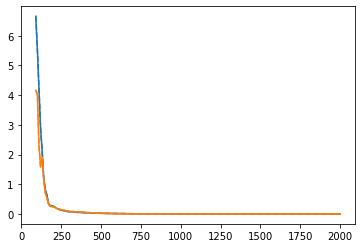

Looks good. Saving this to Hpmtb_LHC13_ATLAS_36.json


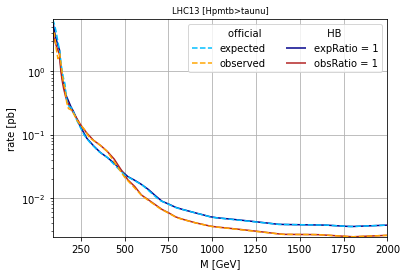

In [4]:
df = fromHB5Table1("079151_Atlas_tbHp-taunu_36fb-1", "ATLAS")
limitFile = implementChannelLimit(
    "1807.07915",
    {"channels": [["Hpmtb", "taunu"]]},
    "Fig. 8a",
    df,
    idSuffix=2,
    massResolution=resolution.taunu["tauh"],
    constraints={"topDecayConsistency": ["brtHpb"]},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# ATLAS 8TeV LHC

## `t>H+b>taunu` [1412.6663](https://arxiv.org/abs/1412.6663)


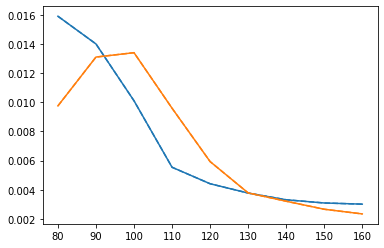

Looks good. Saving this to brtHpb_LHC8_ATLAS_20.json


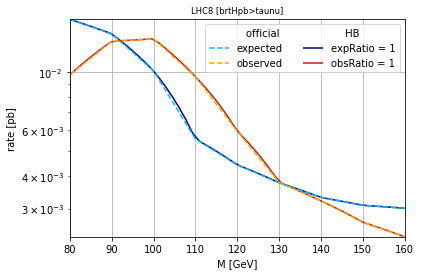

In [5]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1335266/Table%201/1/csv", skip=1
)
df = dfs[0].rename(columns={"M(HIGGS+) [GEV]": "m", "Expected [%]": "exp"})
df["obs"] = dfs[-1].iloc[:, 1]
df.obs *= 1e-2  # from %
df.exp *= 1e-2
limitFile = implementChannelLimit(
    "1412.6663",
    {"channels": [["brtHpb", "taunu"]]},
    "https://doi.org/10.17182/hepdata.68153.v1/t1",
    df,
    idSuffix=1,
    massResolution=resolution.taunu["tauh"],
    constraints={"topDecayConsistency": ["brtHpb"]},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `pp>tH+>taunu` [1412.6663](https://arxiv.org/abs/1412.6663)


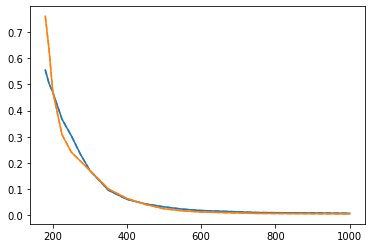

Looks good. Saving this to Hpmtb_LHC8_ATLAS_20.json


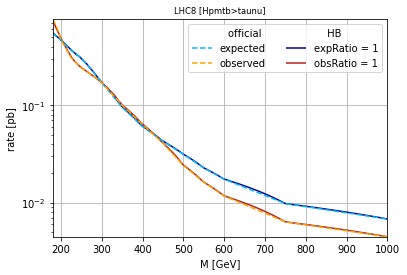

In [6]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1335266/Table%202/1/csv", skip=1
)
df = dfs[0].rename(columns={"M(HIGGS+) [GEV]": "m", "Expected [fb]": "exp"})
df["obs"] = dfs[-1].iloc[:, 1]
df.obs *= 1e-3  # from fb
df.exp *= 1e-3
limitFile = implementChannelLimit(
    "1412.6663",
    {"channels": [["Hpmtb", "taunu"]]},
    "https://doi.org/10.17182/hepdata.68153.v1/t2",
    df,
    idSuffix=2,
    massResolution=resolution.taunu["tauh"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
